# Lab CMBLenses

## Model

In [1]:
] activate "/home/jaimerz/julia_repos/CMBLensingInferenceTestProblem"

  Activating project at `~/julia_repos/CMBLensingInferenceTestProblem`


In [2]:
using CMBLensing, CMBLensingInferenceTestProblem
using CUDA, LaTeXStrings, MCMCDiagnosticTools, Plots, ProgressMeter, Random, Zygote
using LinearAlgebra, Statistics
ENV["LINES"] = 10;

In [3]:
using Revise
using MCHMC

In [4]:
prob = load_cmb_lensing_problem(storage = Array,
                                T = Float32,
                                Nside = 4);

MAP_joint: 100%|████████████████████████████████████████| Time: 0:00:52
  step:        20
  logpdf:      377.00
  α:           0.008522608
  CG:          2 iterations
  Linesearch:  9 bisections


In [5]:
target = CMBLensingTarget(prob);

## Sample

In [6]:
eps=0.0000000001
L=sqrt(target.d)
spl=Sampler(;eps=eps, L=L)

Sampler(Settings(MersenneTwister(0), 1.0e-10, 7.0710678118654755, 0.0, 0.1931833275037836, 0.0005, 2000, 1000, 10, "LF"), MCHMC.Leapfrog)

In [12]:
init = MCHMC.Get_initial_conditions(spl, target)
x, g, u, r, t = init

([0.7551871538162231, 1.9723188877105713, -3.1538174152374268, -4.002882480621338, 0.8755425214767456, 5.323873996734619, -1.4903321266174316, -3.7536017894744873, 2.1242988109588623, 31.004196166992188  …  -1.6442998219499304e-25, 2.999113576182202e-27, 4.989698067323286e-25, 9.930124375544534e-26, -2.6790665439582155e-25, -1.8535128830664963e-25, 2.7516318864772333e-25, -7.254404943755268e-26, -1.6094379124341003, 0.0], [-0.00685547012835741, -0.07400193065404892, 0.07223288714885712, 0.10806597769260406, -0.030852453783154488, -0.07574119418859482, -0.06605406105518341, 0.16427332162857056, -0.33986127376556396, -0.062390703707933426  …  -0.09528117626905441, 0.22921422123908997, -0.003997979685664177, 0.1335257589817047, 0.09592843800783157, 0.07913114130496979, -0.010629531927406788, -0.07857097685337067, -0.22111806858919342, -0.1076651102901874], [-0.3666161000728607, 2.0841095447540283, -2.2693936824798584, -5.356661319732666, 0.5079057812690735, 4.104981899261475, -0.315340101

In [11]:
next_step, sample = MCHMC.Step(spl, target, init)

(([NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, NaN, NaN], NaN, 0.0), [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN])

In [14]:
next_step

([NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, NaN, NaN], NaN, 0.0)

In [9]:
sample

50-element Field-(f°,ϕ°,θ)-Tuple{LambertQUMap{Array{Float64, 3}}, LambertMap{Array{Float64, 2}}, ComponentArrays.ComponentVector{Float64, Vector{Float64}, Tuple{ComponentArrays.Axis{(r = 1, Aϕ = 2)}}}}:
 NaN
 NaN
 NaN
   ⋮
 NaN
 NaN

In [55]:
samples = Sample(spl, target; num_steps=100)

101-element Vector{Vector{Float64}}:
 [0.23362982273101807, 1.6145217418670654, -1.8872356414794922, -3.2767221927642822, 0.8644531965255737, 2.2458934783935547, -1.246073603630066, -2.639155864715576, 1.868626356124878, 3.251345157623291  …  -3.395840053599386e-9, 3.6597669339499816e-11, 4.677404241704153e-9, 1.211756028851596e-9, -5.810230518932258e-9, -2.3360031686792126e-9, 2.561251877253312e-9, -9.142808177209361e-10, -1.6094379124341003, 0.0]
 [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
 [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
 ⋮
 [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
 [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]

## Plotting

In [16]:
Plots.default(fmt=:png, dpi=120, size=(500,300), legendfontsize=10)

In [17]:
rs = [sample[end] for sample in samples]
Aϕs = [sample[end-1] for sample in samples];

In [18]:
println(mean(exp.(rs)), " ", std(exp.(rs)))

NaN NaN


In [19]:
println(mean(exp.(Aϕs)), " ", std(exp.(Aϕs)))

NaN NaN


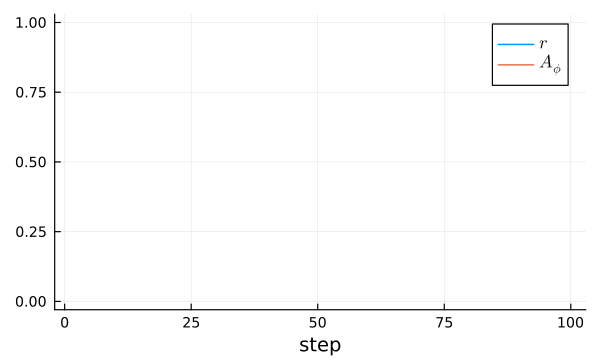

In [20]:
plot(exp.(rs), label=L"r", xlabel="step")
plot!(exp.(Aϕs), label=L"A_\phi")

In [21]:
plot(histogram(exp.(rs), xlabel=L"r", label=nothing, lw=1),
    histogram(exp.(Aϕs), xlabel=L"A_\phi", label=nothing, lw=1))

LoadError: MethodError: reducing over an empty collection is not allowed; consider supplying `init` to the reducer